# Goal

##### 1. To use a(ny?) regression technique to determine if I can predict if a recipe is a dessert or not?
##### 2. Try looking into ways to balanced imbalanced datasets

Data : https://www.kaggle.com/hugodarwood/epirecipes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model

### Data import and EDA

In [2]:
filepath = '../../input_data/epi_r.csv'

recipes = pd.read_csv(filepath)

In [3]:
recipes.shape

(20052, 680)

In [4]:
recipes.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#removing outliers 

# calories are ridiculously high in some.
too_much_cal = recipes.calories < 10000

recipes_fil = recipes[too_much_cal].dropna() #dropping missing values for now TODO: include missing values ? 


Checking what type of variable is calories?

In [6]:
print(recipes_fil.calories.dtype) # looks like a continous variable
recipes_fil.calories.head()

float64


0    426.0
1    403.0
2    165.0
4    547.0
5    948.0
Name: calories, dtype: float64

In [7]:
print(recipes_fil.dessert.dtype)
print(recipes.dessert.head())

float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: dessert, dtype: float64


In [8]:
# Hmmm is it a binary variable ?
recipes.dessert.unique()

array([0., 1.])

Looks like it. Lets try using **Logistic regression** to help our prediction. 

---
Lets look into our output variable a little bit. 

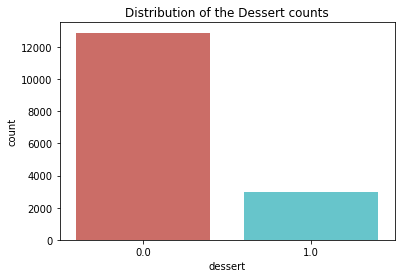

In [9]:
y = recipes_fil.dessert

sns.countplot(x = y, palette='hls')

plt.title("Distribution of the Dessert counts")
plt.show()

There's a lot many non-desserts than desserts. This is an example of an **imbalanced dataset**, where the target variables has many more rows belonging to one category than another. Lets try to quantify this imbalance. 

In [10]:
is_dessert = y == 1
not_dessert = y == 0
total = y.count()

is_dessert_percent = round((y[is_dessert].count()/ total) * 100, 2)
not_dessert_percent = round((y[not_dessert].count()/ total) * 100, 2)

print("Percent of dessert : ", is_dessert_percent)
print("Percent of non - dessert: ", not_dessert_percent)

Percent of dessert :  18.61
Percent of non - dessert:  81.39


---
##### Some exploration 

In [11]:
recipes_fil.groupby('dessert').mean()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
dessert,,,,,,,,,,,,,,,,,,,,,
0.0,3.748110,483.679023,24.640791,28.237611,812.905079,0.000000,0.000078,0.001163,0.001163,0.000543,...,0.001551,0.022102,0.000078,0.000388,0.017216,0.000155,0.000388,0.001241,0.000620,0.026134
1.0,3.814874,515.030190,6.672320,25.988467,222.051221,0.002035,0.000000,0.000000,0.001696,0.000000,...,0.000000,0.024084,0.000000,0.000000,0.001018,0.000000,0.000000,0.001696,0.001696,0.000000


Well you see straightaway that avg. calories are higher for desserts than for non-desserts. But not by much.  
Protein, sodium in lower in desserts.  
Yes you cannot have a salty dessert. Or can you ?  
Also do people rate sweeter stuff as higher ? Hmm... the sweeter it is , the happier you are when you rate ? 😉

In [12]:
x = [col for col in recipes_fil if 'sugar' in col or col in ['dessert', 'calories']]
recipes_fil[x].groupby('dessert').mean()

,calories,low sugar,low/no sugar,no sugar added,sugar conscious,sugar snap pea
dessert,,,,,,
0.0,483.679023,0.000853,0.016983,0.184257,0.146026,0.004343
1.0,515.030190,0.000000,0.001018,0.012551,0.010176,0.000000


In [13]:
# lets look into ingredients commonly found in desserts ?

# lets first select the desserts 
desserts_df = recipes_fil[recipes_fil.dessert == 1]

In [14]:
bo = desserts_df.any(axis = 'columns')
non_zero_columns = (desserts_df[bo] != 0).any()

#ingredients df
desserts_df = desserts_df.loc[:, non_zero_columns]


#Hmm, lets see what ingredients people use in dessert recipes. 
desserts_df.columns.values

array(['title', 'rating', 'calories', 'protein', 'fat', 'sodium',
       '#cakeweek', '3-ingredient recipes', 'advance prep required',
       'alcoholic', 'almond', 'amaretto', 'anise', 'anniversary',
       'appetizer', 'apple', 'apple juice', 'apricot', 'arizona',
       'asian pear', 'atlanta', 'avocado', 'back to school',
       'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil',
       'bastille day', 'bean', 'beer', 'berry', 'birthday', 'blackberry',
       'blender', 'blue cheese', 'blueberry', 'boil', 'bon appétit',
       'bon app��tit', 'boston', 'bourbon', 'brandy', 'bread',
       'breadcrumbs', 'breakfast', 'broil', 'brooklyn', 'brownie',
       'brunch', 'buffet', 'butter', 'buttermilk', 'butterscotch/caramel',
       'cabbage', 'cake', 'california', 'calvados', 'cambridge',
       'campari', 'canada', 'candy', 'candy thermometer', 'cantaloupe',
       'cardamom', 'carrot', 'cashew', 'casserole/gratin', 'chambord',
       'champagne', 'chartreuse', 'cheddar', 'c

In [15]:
desserts_df.groupby('zucchini').count()

,title,rating,calories,protein,fat,sodium,#cakeweek,3-ingredient recipes,advance prep required,alcoholic,...,weelicious,wheat/gluten-free,whiskey,white wine,whole wheat,wine,winter,yogurt,snack,snack week
zucchini,,,,,,,,,,,,,,,,,,,,,
0.0,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,...,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945
1.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


Whoa !! Who uses zucchini in their desserts ? 

In [16]:
desserts_df[desserts_df.zucchini == 1][['title', 'calories']]

# ok ok not judging. 

,title,calories
6087,Zucchini-Pecan Cake with Cream Cheese Frosting,453.0
9865,Fudgy Orange-Zucchini Cake with Orange Glaze,323.0
15531,Spiced Zucchini Bread,300.0


I also see names of some cities, states and countries. TODO: Lets work on removing these. 

### Lets look into using only calories to predict whether a recipe is a dessert. 
Meaning we're using only one variable to predict the dessert (1) or non-dessert (0) status. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Lets split our original data into training and test data. *Remember, we have'nt balanced this dataset yet.*

In [32]:
# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, test_X, train_y, test_y = train_test_split(recipes_fil, 
                                                    y, 
                                                    train_size = 0.7, # 70: 30 split
                                                    test_size = 0.3,
                                                    random_state = 0)

## X 
im_X = train_X[['calories']] # Looking at only one variable for now

Lets now create our model. 

In [33]:
# Fitting the model 

logis = LogisticRegression(random_state=0, solver='liblinear')
logis_model = logis.fit(im_X, train_y)

# Making predictions using the 'unseen' test_X[['calories']]

pred_1 = logis_model.predict(test_X)

ValueError: could not convert string to float: 'Toasted Jalapeño Corn Bread '

Lets try evaluating it ! 

In [20]:
# calculate accuracy
print(metrics.accuracy_score(test_y, pred_1))

0.8188512518409425


Hmmph ! This is pretty good in predicting dessert status right? Even when we used an imbalanced dataset i.e. we didnt have enough training instances for our positive class (is a dessert) and we still got a pretty good accuracy.  
  
So , fixing the imbalance should only improve the accuracy, right?  
  
Let's try figuring out that next. 

---

### Handling class Imbalance. 

What we're trying to do in this topic is create a 1:1 ratio of the two types of target classes i.e. dessert and non-dessert.  We do this so that our model can detect either class with equal power. If we don't balance our target variable our model will be trained to detect one one target class (guess which one) better than the other. In some cases this is what you may need as well. It all depends on what you want your model to do. 
  
  
#### NOTE: 
Always do the balancing AFTER the test train split, because in our test data (which the model never sees) the distribution of the target classes should be as REAL as possible. This will be the true test of how good our model performs and we should test the model on an augmented, balanced dataset. 
  
  
  
Here lets try 2 commonly used techniques 
* Undersampling -- reduces the number of training instances of the majority target class seen in the data 
* Oversampling -- increases the number of training instances of the minority target class seen in the data

#### Undersampling

In [21]:
# Lets shuffle the data before creating the subsamples
train_X = train_X.sample(frac=1)

# number of instances which are desserts in the training dataset
des_no_test = 
#Lets pick up the same number of records from the majority class
non_desert_df = recipes_fil[recipes_fil.dessert == 0]
non_desert_df_un = non_desert_df.iloc[:len(desserts_df)]

# amount of minority class 
print("Count of minority class is : ", len(desserts_df))

#amount of majority class 
print("Count of majority undersamples class is : ", len(non_desert_df_un))

Count of minority class is :  2948
Count of majority undersamples class is :  2948


In [28]:
is_dessert = train_X['dessert'] == 1
train_X[is_dessert].count()

KeyError: 'dessert'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


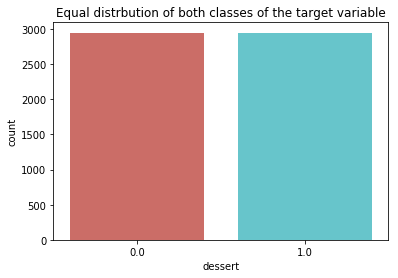

In [23]:
#generating a balanced input dataset
co_df = pd.concat([desserts_df, non_desert_df_un], axis=0)

# Shuffle dataframe rows _un for undersampling
ba_recipes_df_un = co_df.sample(frac= 1, random_state = 1)

#lets confirm 
sns.countplot(x = ba_recipes_df_un.dessert, palette='hls')
plt.title('Equal distrbution of both classes of the target variable')
plt.show()

The distribution now looks more even compared to earlier. Remember this dataset, we'll use it again while comparing models generated from different kinds of datasets (imbalanced, balanced using oversampling, balanced using undersampling etc...).  
  

**One problem** with the random undersampling is that we are underutilizing the potential of the dataset. We are throwing away all those extra instances of majority class which could have helped train the model. So there is **'information loss'**. When we have a VERY large dataset, this is more acceptable.

#### Oversampling
We will go over two (more in the future) commonly used kinds of oversampling :
* Random Oversampling 
* Synthetic Minority Oversampling Technique (SMOTE)

##### Random Oversampling 
This is the most naive strategy where we create new samples by simply using copies of existing samples, i.e. sampling using *replacement* of the current available minority class. The sample should match the number of instances of the majority class, so that the latter doesn't take over during training. 

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
r_osampler = RandomOverSampler(random_state = 0)